In [99]:
import os
import pathlib
import random
import sys

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [100]:
os.getcwd()
INSPECTION_PATH = pathlib.Path(os.getcwd()).parent / "country-backend"
sys.path.append(str(INSPECTION_PATH.absolute()))

In [101]:
from country.model.predict import model
from country.model.predict import preprocess, prediction, predict_image

In [102]:
from country.explainer.new_lime_ import explain_image
from PIL import Image


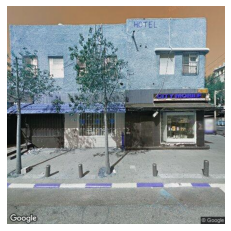

In [103]:
img = np.array(cv2.imread("C:\\Users\\Matze\\Documents\\University\\Work\\BeispielBilder\\from_xaidemo.de\\i1.jpg"))
plt.imshow(img)
plt.axis("off")
plt.show()
img = preprocess(img)
img = np.squeeze(img)

In [126]:
image_explanation = explain_image(img = img, seg_method = "felzenszwalb", seg_settings = {}, num_of_samples = 200, samples_p = 0.5,
                  model_ = model, threshold = 0.3, volume = 45, colour =  "red")
print(img.shape)
gradient=[
np.ones((1,1)) * [173, 38, 38] / 255*1.0,
np.ones((1,1)) * [173, 38, 38] / 255*0.8,
np.ones((1,1)) * [173, 38, 38] / 255*0.6,
np.ones((1,1)) * [173, 38, 38] / 255*0.4,
np.ones((1,1)) * [173, 38, 38] / 255*0.2,
np.ones((1,1)) * [173, 38, 38] / 255*0.0,
]

(224, 224, 3)


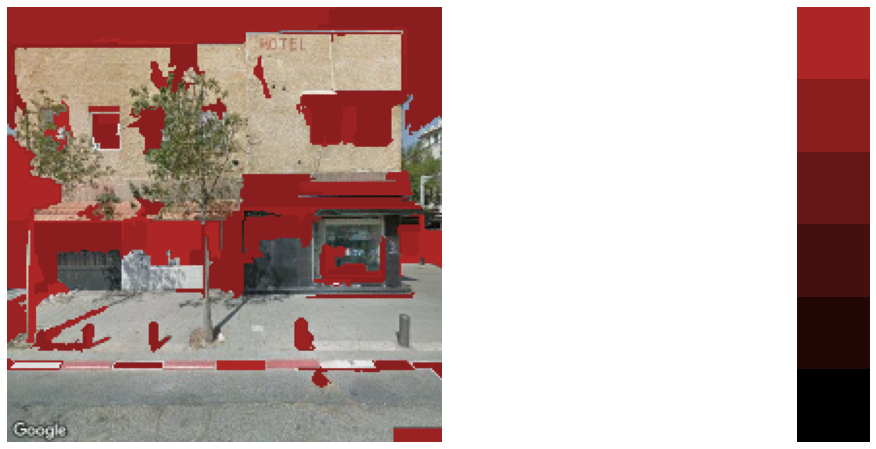

In [136]:
f, axarr = plt.subplots(1,2, figsize = (20, 8))

axarr[0].axis("off")
axarr[1].axis("off")
axarr[0].imshow(image_explanation)
axarr[1].imshow(gradient)